In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\nonst\anaconda3\envs\python_work\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
df_Africa = df_Africa = df[((df['job_country'] == 'South Africa') |  (df['job_country'] == 'Sudan') | (df['job_country'] == 'Egypt') | (df['job_country'] == 'Kenya') | (df['job_country'] == 'Nigeria')) & (df['job_title_short'] == 'Data Analyst')].dropna(subset='salary_year_avg').copy()
df_Africa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2390,Data Analyst,Data Analyst,"Midland, TX",via Indeed,Full-time,False,Sudan,2023-08-25 13:40:40,False,True,Sudan,year,70000.0,NaN,"Advanced Stimulation Technologies, Inc","[c, outlook, word, excel, powerpoint]","{'analyst_tools': ['outlook', 'word', 'excel',..."
4709,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,Sudan,2023-10-09 13:40:58,False,False,Sudan,year,77500.0,NaN,Simplex.,"[python, sql, sqlite, snowflake, azure]","{'cloud': ['snowflake', 'azure'], 'databases':..."
9448,Data Analyst,Marketing Data Analyst,"Dallas, TX",via Ai-Jobs.net,Full-time,False,Sudan,2023-08-17 13:38:18,False,False,Sudan,year,90000.0,NaN,OrderMyGear,"[sql, looker, excel, tableau, power bi]","{'analyst_tools': ['looker', 'excel', 'tableau..."
13750,Data Analyst,Data Conversion Analyst,Anywhere,via LinkedIn,Full-time,True,Sudan,2023-06-23 14:21:18,False,False,Sudan,year,100000.0,NaN,Insight Global,[power bi],{'analyst_tools': ['power bi']}
35631,Data Analyst,Data Analyst must have telecom domain experince,Anywhere,via LinkedIn,Contractor,True,Sudan,2023-04-28 13:56:12,True,False,Sudan,year,130000.0,NaN,ApTask,"[sql, python, sheets, flow]","{'analyst_tools': ['sheets'], 'other': ['flow'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764620,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,Sudan,2023-04-28 20:56:12,True,False,Sudan,year,87500.0,NaN,Insight Global,"[sql, c#, sql server, excel, flow]","{'analyst_tools': ['excel'], 'databases': ['sq..."
768494,Data Analyst,"Data Analyst / Data Scientist, Wholesale","Dallas, TX",via Talentify,Full-time,False,Sudan,2023-06-29 02:26:06,False,False,Sudan,year,118965.0,NaN,Frontier Communications,"[python, pandas, excel, alteryx]","{'analyst_tools': ['excel', 'alteryx'], 'libra..."
771222,Data Analyst,IT Data Analyst,"Amarillo, TX",via Ladders,Full-time,False,Sudan,2023-01-07 02:05:34,False,True,Sudan,year,115000.0,NaN,Xcel Energy,None,None
771454,Data Analyst,Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-06-21 02:00:05,False,False,Sudan,year,100500.0,NaN,Govini,"[python, r]","{'programming': ['python', 'r']}"


In [11]:
df_af_explode = df_Africa.explode('job_skills')
df_af_explode[['job_skills','salary_year_avg']]

,job_skills,salary_year_avg
2390,c,70000.0
2390,outlook,70000.0
2390,word,70000.0
2390,excel,70000.0
2390,powerpoint,70000.0
...,...,...
771222,None,115000.0
771454,python,100500.0
771454,r,100500.0
771915,word,69900.0


In [29]:
df_optimal_skills = df_af_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_optimal_skills = df_optimal_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_optimal_skills

,skill_count,median_salary
job_skills,,
sql,87,87500.0
excel,58,83450.0
python,47,95000.0
tableau,41,91800.0
power bi,33,89500.0
...,...,...
numpy,1,107000.0
plotly,1,82879.0
postgresql,1,80000.0


In [45]:
total_jobs =len(df_Africa)
df_optimal_skills['skill_percent'] = (df_optimal_skills['skill_count']/total_jobs) *100
df_optimal_skills = df_optimal_skills[df_optimal_skills['skill_count'] > 0].head(10)
df_optimal_skills



,skill_count,median_salary,skill_percent
job_skills,,,
sql,87,87500.0,54.716981
excel,58,83450.0,36.477987
python,47,95000.0,29.559748
tableau,41,91800.0,25.786164
power bi,33,89500.0,20.754717
r,28,91800.0,17.610063
sas,26,91800.0,16.352201
oracle,19,99764.0,11.949686
word,17,70000.0,10.691824


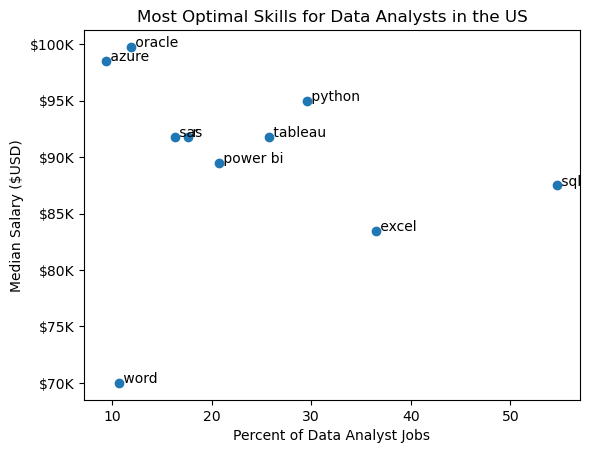

In [46]:

plt.scatter(df_optimal_skills['skill_percent'], df_optimal_skills['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  
plt.title('Most Optimal Skills for Data Analysts in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

texts = []
for i, txt in enumerate(df_optimal_skills.index):
    texts.append(plt.text(df_optimal_skills['skill_percent'].iloc[i], df_optimal_skills['median_salary'].iloc[i], " " + txt))

plt.show()